# Rabi model fitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
%matplotlib inline

## The model

According to the Rabi model, the probability of being in the excited state, $p_e$ is given by,

\begin{equation}
    P_e = a_0 + a_1 \frac{\Omega^2}{W^2} \left[ 1 - \left( e^{-\frac{t}{T_1}} \cos \left( 2\pi Wt + \phi \right) \right) \right] + a_2 \left( 1 - e^{-\frac{t}{T_{decay}}} \right)
\end{equation}
where $W = \sqrt{\Omega^2 + \delta^2}$, $\Omega$ is the Rabi frequency, $\delta$ is the detuning, $T_1$ is the relaxational coherence time, and $t$ is time.

This gives a form which looks like the plot below.

In [8]:
def rabiModel(time, rabiFreq, T1, Tdec, phi, a0, a1, a2, detuning=0.0):
    phi_deg = phi*(np.pi/180)
    W = np.sqrt(rabiFreq**2 + detuning**2)
    ampl = rabiFreq**2 / W**2 
    osci = np.cos(2*np.pi*W*time + phi_deg)
    expo = np.exp(-time/T1)
    decay = np.exp(-time/Tdec)
    return a0 + a1*ampl*(1 - (expo * osci)) + a2 * (1 - decay)

## Plot example model

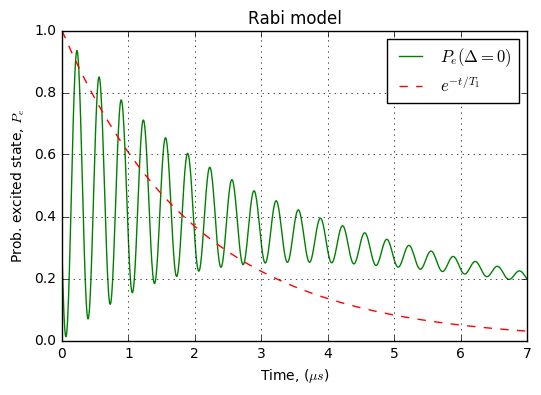

In [23]:
time_start = 0.0
time_end = 7.0
time_steps = 1000
time_fit = np.linspace(time_start,time_end,time_steps)
rabiFreq = 3
T1 = 2
Tdec = 20
phi = -65
a0 = 0
a1 = 0.5
a2 = -1.0

p_e_fit = rabiModel(time_fit, rabiFreq, T1, Tdec, phi, a0, a1, a2, detuning=0)
plt.plot(time_fit, p_e_fit, 'g-', label='$P_e (\Delta = 0)$')

plt.plot(time_fit, np.exp(-time_fit/T1), 'r--', label='$e^{-t/T_1}$')
plt.xlabel("Time, ($\mu s$)")
plt.ylabel("Prob. excited state, $P_e$")
plt.title("Rabi model")
plt.legend()
plt.ylim([0.0, 1.0])
plt.grid()

## Plot data and initial guess

In [30]:
d0,d1,d2,d3,d4,d5,d6,d7,d8,d9 = np.loadtxt('SR080317_026.dat',delimiter="\t",unpack=True)
time_exp = d1*1e6
p_e_exp = d4-min(d4)
p_e_exp = p_e_exp/max(p_e_exp)

cropNum = 170
time_exp = time_exp[1:len(time_exp)-cropNum]
p_e_exp = p_e_exp[1:len(p_e_exp)-cropNum]

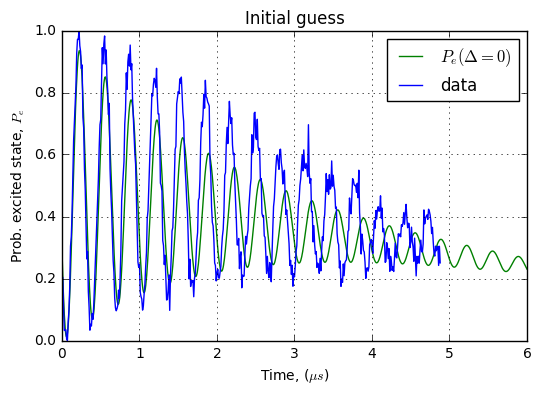

In [36]:
time_start = 0.0
time_end = 6.0
time_steps = 1000
time_fit = np.linspace(time_start,time_end,time_steps)
# Initial guess
rabiFreq = 3
T1 = 2
Tdec = 20
phi = -65
a0 = 0
a1 = 0.5
a2 = -1.0

p_e_fit = rabiModel(time_fit, rabiFreq, T1, Tdec, phi, a0, a1, a2, detuning=0)
plt.plot(time_fit, p_e_fit, 'g-', label='$P_e (\Delta = 0)$')

plt.plot(time_exp,p_e_exp, 'b-', label='data')
plt.xlabel("Time, ($\mu s$)")
plt.ylabel("Prob. excited state, $P_e$")
plt.title("Initial guess")
plt.legend()
plt.ylim([0.0, 1.0])
plt.grid()

## Curve fitting

The fitted value of  rabiFreq  is  3.08480758525  with error  0.00150429839376
The fitted value of  T1  is  2.74326532885  with error  0.0703087388151
The fitted value of  Tdec  is  52300.4860833  with error  15019135.9819
The fitted value of  phi  is  -67.5211327602  with error  0.89575833864
The fitted value of  a0  is  -0.00395430517709  with error  0.00909365648371
The fitted value of  a1  is  0.551295544849  with error  0.00835126952755
The fitted value of  a2  is  -2459.14186012  with error  706154.376154


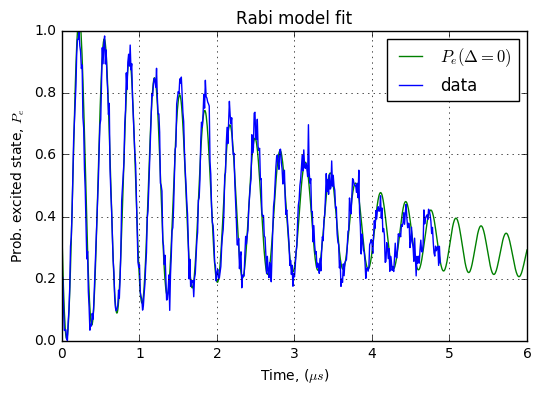

In [37]:
guess = [rabiFreq, T1, Tdec, phi, a0, a1, a2]
popt,pcov = curve_fit(rabiModel, time_exp, p_e_exp, p0=guess)

perr = np.sqrt(np.diag(pcov))
params = ['rabiFreq', 'T1', 'Tdec', 'phi', 'a0', 'a1', 'a2']

for idx in range(len(params)):
    print( "The fitted value of ", params[idx], " is ", popt[idx], " with error ", perr[idx] )

p_e_fit = rabiModel(time_fit,*popt)
plt.plot(time_fit, p_e_fit, 'g-', label='$P_e (\Delta = 0)$')
plt.plot(time_exp,p_e_exp, 'b-', label='data')
plt.xlabel("Time, ($\mu s$)")
plt.ylabel("Prob. excited state, $P_e$")
plt.title("Rabi model fit")
plt.legend()
plt.ylim([0.0, 1.0])
plt.grid()